## KAN RL

In [1]:
!pip install moviepy~=1.0.3 gymnasium pykan~=0.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 378.9/388.3 kB 13.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 8.0 MB/s eta 0:00:00


  Preparing metadata (setup.py) ... -

 done


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/26.9 MB ? eta -:--:--

   ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/26.9 MB 128.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 13.7/26.9 MB 131.6 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━ 17.2/26.9 MB 115.4 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━ 25.7/26.9 MB 110.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.9/26.9 MB 112.0 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.9/26.9 MB 112.0 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 41.3 MB/s eta 0:00:00


 \

 done
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110720 sha256=4f00d89cfedb656e0ceca932a7aff4be62a2cd7cc3fa72c16996043bc34ee625
  Stored in directory: /root/.cache/pip/wheels/96/32/2d/e10123bd88fbfc02fed53cc18c80a171d3c87479ed845fa7c1
Successfully built moviepy


  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1


    Uninstalling decorator-5.1.1:


      Successfully uninstalled decorator-5.1.1


## Models

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/9912422 [00:00<?, ?it/s]

  1%|          | 65536/9912422 [00:00<00:19, 495103.34it/s]

  3%|▎         | 294912/9912422 [00:00<00:07, 1205207.02it/s]

 11%|█         | 1081344/9912422 [00:00<00:02, 3308504.86it/s]

 43%|████▎     | 4227072/9912422 [00:00<00:00, 11164117.01it/s]

100%|█████████▉| 9895936/9912422 [00:00<00:00, 22194468.75it/s]

100%|██████████| 9912422/9912422 [00:00<00:00, 14571617.97it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/28881 [00:00<?, ?it/s]

100%|██████████| 28881/28881 [00:00<00:00, 439346.34it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/1648877 [00:00<?, ?it/s]

  4%|▍         | 65536/1648877 [00:00<00:03, 490923.54it/s]

 16%|█▌        | 262144/1648877 [00:00<00:01, 1058222.64it/s]

 62%|██████▏   | 1015808/1648877 [00:00<00:00, 3164545.81it/s]

100%|██████████| 1648877/1648877 [00:00<00:00, 4027836.18it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/4542 [00:00<?, ?it/s]

100%|██████████| 4542/4542 [00:00<00:00, 1821622.56it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



State shape: torch.Size([1, 8, 8])
Label: tensor(5)
Feedback shape: torch.Size([1, 8, 8])


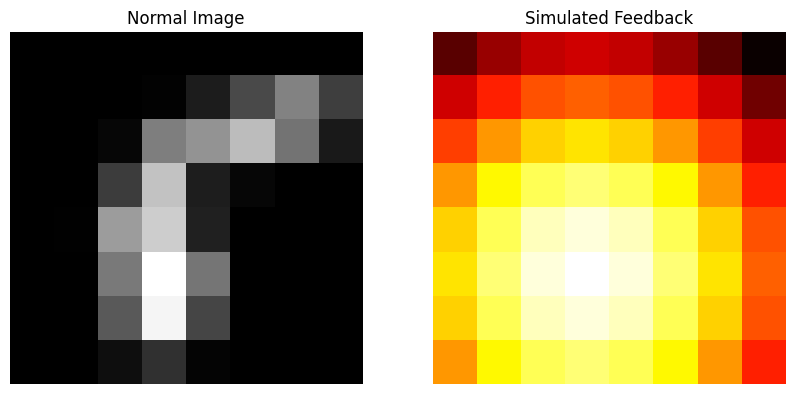

tensor(0.4404) tensor(1.)


In [2]:
# @title

import torch
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

class MNISTEnvironment:
    def __init__(self, batch_size, image_size=(8, 8), feedback_sigma=5.0):
        self.batch_size = batch_size
        self.image_size = image_size
        self.feedback_sigma = feedback_sigma
        self.transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ])
        dataset = MNIST('./data', train=True, download=True, transform=self.transform)
        self.loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        self.iterator = iter(self.loader)
        self.reset()

    def reset(self):
        try:
            self.current_batch = next(self.iterator)
        except StopIteration:
            self.iterator = iter(self.loader)
            self.current_batch = next(self.iterator)
        self.idx = 0

    def step(self):
        images, labels = self.current_batch
        if self.idx >= len(images):
            self.reset()
            return self.step()
        state = images[self.idx]
        label = labels[self.idx]
        feedback = self.generate_simulated_feedback(state.unsqueeze(0))
        self.idx += 1
        return state, label, feedback

    def generate_simulated_feedback(self, image_tensor):
        image_np = image_tensor.squeeze().numpy()

        image_np = (image_np - np.min(image_np)) / (np.max(image_np) - np.min(image_np))

        center_of_mass = np.array(np.unravel_index(np.argmax(image_np), image_np.shape))

        x, y = np.meshgrid(np.arange(image_np.shape[1]), np.arange(image_np.shape[0]))
        gaussian_mask = np.exp(-((x - center_of_mass[1])**2 + (y - center_of_mass[0])**2) / (2 * self.feedback_sigma**2))

        feedback = gaussian_mask / np.max(gaussian_mask)
        return torch.tensor(feedback, dtype=torch.float32).view(1, *feedback.shape)


def plot_images(normal_image, feedback_image):
    # Convert tensors to numpy arrays
    normal_image_np = normal_image.squeeze().numpy()
    feedback_image_np = feedback_image.squeeze().numpy()

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Plot normal image
    axes[0].imshow(normal_image_np, cmap='gray')
    axes[0].set_title('Normal Image')
    axes[0].axis('off')

    # Plot feedback image
    axes[1].imshow(feedback_image_np, cmap='hot')  # Using 'jet' colormap to visualize feedback
    axes[1].set_title('Simulated Feedback')
    axes[1].axis('off')

    plt.show()


# Example usage:
if __name__ == "__main__":
    env = MNISTEnvironment(batch_size=128, feedback_sigma=5.0)
    state, label, feedback = env.step()
    print("State shape:", state.shape)
    print("Label:", label)
    print("Feedback shape:", feedback.shape)
    plot_images(state, feedback)
    print(feedback.min(), feedback.max())

In [3]:
# @title
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.distributions as dist
from torch.optim.lr_scheduler import ExponentialLR

class FSNet(nn.Module):
    def __init__(self, input_shape, num_filters, num_conv_layers=3, hidden_dim=128, distribution=None, tau=1.0):
        super(FSNet, self).__init__()

        self.distribution = distribution
        self.global_step = 0
        self.initial_tau = tau
        self.tau_decay = 0.96  # Exponential decay rate

        layers = []
        in_channels = input_shape[0]
        channels = []

        for i in range(num_conv_layers):
            num_filters *= 2
            channels.append(num_filters)

        for i in range(num_conv_layers):
            # For a convolutional layer to keep the input and output shapes the same: P = (K-1)/2 with S = 1
            layers.append(nn.Conv2d(in_channels=in_channels, out_channels=channels[i], kernel_size=3, padding=1, stride=1))
            layers.append(nn.ReLU())
            # Each MaxPool2d layer with kernel size 2 and stride 2 will halve the height and width of the feature maps.
            layers.append(nn.MaxPool2d(2, 2))
            in_channels = channels[i]

        layers.append(nn.Flatten())
        self.feature_extractor = nn.Sequential(*layers)

        # Dummy forward pass to determine the output size of the feature extractor
        dummy_input = torch.empty(1, *input_shape)
        n_features = self.feature_extractor(dummy_input).shape[1]
        # print(n_features)

        self.fc1 = nn.Linear(n_features, hidden_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.25)
        self.fc2 = nn.Linear(hidden_dim, n_features)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=-1)

        # Storage for probabilities and feedback costs
        self.probs_history = []
        self.feedback_cost_history = []


    def forward(self, x, feedback=None, epoch=0, n_epochs=None):
        x = x.view(-1, 1, input_shape[1], input_shape[2])
        features = self.feature_extractor(x)

        x = self.relu(self.fc1(features))
        probs_logits = self.relu(self.fc2(x))
        probs = self.sigmoid(probs_logits)

        # Apply the simulated feedback as a weight to the feature selection
        if feedback is None:
            feedback = probs # so that mse_loss becomes 0 if no feedback is fed
        else:
            pass

        # Use distribution as weight of the features
        if self.distribution == 'bernoulli':
            mask = torch.distributions.Bernoulli(logits=probs_logits)
            sample_probs = mask.sample()
        if self.distribution == 'gumbel_softmax':
            tau = self.initial_tau * (self.tau_decay ** epoch)
            mask = F.gumbel_softmax(logits=probs_logits, tau=tau, hard=False)
            sample_probs = mask
        if self.distribution == 'gaussian':
            mu = probs_logits  # or some transformation of probs_logits
            sigma = torch.ones_like(mu)  # Standard deviation
            gaussian_dist = torch.distributions.Normal(mu, sigma)
            sample_probs = gaussian_dist.rsample()  # Use rsample for the reparameterization trick
        if self.distribution == 'beta':
            alpha = F.softplus(probs_logits) + 1
            beta = F.softplus(probs_logits) + 1
            beta_dist = torch.distributions.Beta(alpha, beta)
            sample_probs = beta_dist.sample()
        if self.distribution == 'dirichlet':
            concentration = F.softplus(probs_logits) + 1  # Ensuring positive values
            dirichlet_dist = torch.distributions.Dirichlet(concentration)
            sample_probs = dirichlet_dist.sample()
        elif self.distribution == 'multinomial':
            logits = probs_logits  # Logits for the multinomial distribution
            mask = torch.distributions.Multinomial(logits=logits)
            sample_probs = mask.sample()
        elif self.distribution == 'laplace':
            loc = probs_logits  # Mean of the logistic distribution
            scale = torch.ones_like(loc)  # Scale parameter
            laplace_dist = torch.distributions.Laplace(loc, scale)
            sample_probs = laplace_dist.sample()
        elif self.distribution == 'cauchy':
            loc = probs_logits  # Mean of the logistic distribution
            scale = torch.ones_like(loc)  # Scale parameter
            cauchy_dist = torch.distributions.Cauchy(loc, scale)
            sample_probs = cauchy_dist.sample()
        elif self.distribution == 'uniform':
            low = torch.zeros_like(probs_logits)  # Lower bound
            high = torch.ones_like(probs_logits)  # Upper bound
            uniform_dist = torch.distributions.Uniform(low, high)
            sample_probs = uniform_dist.sample()            

        # print(sample_probs.shape)

        feedback_cost = F.mse_loss(probs, feedback)

        flat_zoom_X = features * sample_probs

        return flat_zoom_X, feedback_cost, probs


# Example usage:
input_shape = (1, 8, 8)  # Change this to the desired input shape
num_conv_layers = 2  # Specify the desired number of convolutional layers
num_filters = 4 # [2,4], [3,8]
model = FSNet(input_shape, num_filters, num_conv_layers, hidden_dim=128, distribution='uniform')
print(model)

# Test with an example input
example_input = torch.randn(*input_shape)

# print(flat_zoom_X, probs)
# print(flat_zoom_X.shape[1])
flat_zoom_X, feedback_cost, probs = model.forward(example_input)
print(flat_zoom_X.shape)

FSNet(
  (feature_extractor): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
  )
  (fc1): Linear(in_features=64, out_features=128, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=-1)
)
torch.Size([1, 64])


In [4]:
# @title
from collections import deque
import os
import time
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, random_split
from kan import KAN
from torch.utils.tensorboard import SummaryWriter
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from typing import Dict, Tuple, Optional, Callable, Union

class ReplayBuffer:
    def __init__(self, capacity, observation_dim):
        self.capacity = capacity
        self.observations = torch.zeros(capacity, observation_dim)
        self.actions = torch.zeros(capacity, 1, dtype=torch.int64)
        self.next_observations = torch.zeros(capacity, observation_dim)
        self.rewards = torch.zeros(capacity, 1)
        self.terminations = torch.zeros(capacity, 1, dtype=torch.int)
        self.cursor = 0

    def add(self, observation, action, next_observation, reward, termination):
        index = self.cursor % self.capacity
        self.observations[index] = observation
        self.actions[index] = action
        self.next_observations[index] = next_observation
        self.rewards[index] = reward
        self.terminations[index] = termination
        self.cursor += 1

    def sample(self, batch_size):
        idx = np.random.permutation(np.arange(len(self)))[:batch_size]
        return (
            self.observations[idx],
            self.actions[idx],
            self.next_observations[idx],
            self.rewards[idx],
            self.terminations[idx],
        )

    def __len__(self):
        return min(self.cursor, self.capacity)



def kan_train(
    net,
    target,
    data,
    optimizer,
    gamma=0.99,
    lamb=0.0,
    lamb_l1=1.0,
    lamb_entropy=2.0,
    lamb_coef=0.0,
    lamb_coefdiff=0.0,
    small_mag_threshold=1e-16,
    small_reg_factor=1.0,
    feedback_cost=None,
    feature_selection=False,
):
    

    def reg(acts_scale):
        def nonlinear(x, th=small_mag_threshold, factor=small_reg_factor):
            return (x < th) * x * factor + (x > th) * (x + (factor - 1) * th)

        reg_ = 0.0
        for i in range(len(acts_scale)):
            vec = acts_scale[i].reshape(
                -1,
            )

            p = vec / torch.sum(vec)
            l1 = torch.sum(nonlinear(vec))
            entropy = -torch.sum(p * torch.log2(p + 1e-4))
            reg_ += lamb_l1 * l1 + lamb_entropy * entropy  # both l1 and entropy

        # regularize coefficient to encourage spline to be zero
        for i in range(len(net.act_fun)):
            coeff_l1 = torch.sum(torch.mean(torch.abs(net.act_fun[i].coef), dim=1))
            coeff_diff_l1 = torch.sum(
                torch.mean(torch.abs(torch.diff(net.act_fun[i].coef)), dim=1)
            )
            reg_ += lamb_coef * coeff_l1 + lamb_coefdiff * coeff_diff_l1

        return reg_

    observations, actions, next_observations, rewards, terminations = data

    with torch.no_grad():
        next_q_values = net(next_observations.detach())
        next_actions = next_q_values.argmax(dim=1)
        next_q_values_target = target(next_observations.detach())
        target_max = next_q_values_target[range(len(next_q_values)), next_actions]
        td_target = rewards.detach().flatten() + gamma * target_max * (
            1 - terminations.detach().flatten()
        )


    old_val = net(observations.detach()).gather(1, actions.detach()).squeeze()
    criterion = nn.SmoothL1Loss()
    # criterion = nn.MSELoss()
    # loss = criterion(td_target, old_val)
    reg_ = reg(net.acts_scale)
    loss = criterion(td_target, old_val) + lamb * reg_

    # Combine the original cost function with the feedback loss
    if feature_selection == True:
        combined_loss = loss + 0.5 * feedback_cost.detach()
    # print(loss, feedback_cost.detach())
    else:
        combined_loss = loss

    optimizer.zero_grad()
    combined_loss.backward()

    # In-place gradient clipping
    torch.nn.utils.clip_grad_value_(net.parameters(), 100)
    optimizer.step()

    return combined_loss.item()

def mlp_train(
    net,
    target,
    data,
    optimizer,
    gamma=0.99,
    feedback_cost=None,
    feature_selection=False,
):
    observations, actions, next_observations, rewards, terminations = data

    # Compute everything related to primary loss in a single block to retain the graph
    with torch.no_grad():
        next_q_values = net(next_observations.detach())
        next_actions = next_q_values.argmax(dim=1)
        next_q_values_target = target(next_observations.detach())
        target_max = next_q_values_target[range(len(next_q_values)), next_actions]
        td_target = rewards.detach().flatten() + gamma * target_max * (
            1 - terminations.detach().flatten()
        )

    old_val = net(observations.detach()).gather(1, actions.detach()).squeeze()
    criterion = nn.SmoothL1Loss()
    # criterion = nn.MSELoss()
    loss = criterion(td_target, old_val)

    # Combine the original cost function with the feedback loss
    if feature_selection == True:
      combined_loss = loss + 0.5 * feedback_cost.detach()
    # print(loss, feedback_cost.detach())
    else:
      combined_loss = loss

    optimizer.zero_grad()
    combined_loss.backward()

    # In-place gradient clipping
    torch.nn.utils.clip_grad_value_(net.parameters(), 100)
    optimizer.step()

    return combined_loss.item()


def set_all_seeds(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.use_deterministic_algorithms(True)



2024-08-14 17:49:15.465275: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-14 17:49:15.465421: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-14 17:49:15.628751: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
# @title
import os
import time
import random
import shutil
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import ExponentialLR
from torch.utils.tensorboard import SummaryWriter
import numpy as np
from tqdm import tqdm

def kanRL(config):
      set_all_seeds(config["seed"])
      env = MNISTEnvironment(config["batch_size"])
      results_dir = 'results'

      # Check if the directory exists before trying to delete it
      # if os.path.exists(results_dir) and os.path.isdir(results_dir):
      #     shutil.rmtree(results_dir)
      #     print(f"Directory '{results_dir}' has been deleted.")
      # else:
      #     print(f"Directory '{results_dir}' does not exist.")

      input_shape = (config['first_channel'], int(config['input_size']**0.5), int(config['input_size']**0.5))  # Change this to the desired input shape
      print(input_shape)
      agent = FSNet(input_shape, config['num_filters'], config['num_conv_layers'], config['hidden_dim'], distribution=config['distribution'], tau=config['initial_tau'])
      print(agent)

      if config["feature_selection"] == True:
          example_input = torch.randn(*input_shape)
          features, _, _ = agent(example_input)
          n_features = features.shape[1]
          print(n_features)
      else:
          n_features = config["input_size"]

      if config["method"] == "KAN":
          q_network = KAN(
              width=[n_features, config["width"], config["output_size"]],
              grid=config["grid"],
              k=3,
              bias_trainable=False,
              sp_trainable=False,
              sb_trainable=False,
          )
          target_network = KAN(
              width=[n_features, config["width"], config["output_size"]],
              grid=config["grid"],
              k=3,
              bias_trainable=False,
              sp_trainable=False,
              sb_trainable=False,
          )
          train = kan_train
      elif config["method"] == "MLP":
          q_network = nn.Sequential(
              nn.Linear(n_features, config["width"]),
              nn.ReLU(),
              nn.Linear(config["width"], config["output_size"]),
          )
          target_network = nn.Sequential(
              nn.Linear(n_features, config["width"]),
              nn.ReLU(),
              nn.Linear(config["width"], config["output_size"]),
          )
          train = mlp_train
      else:
          raise Exception(
              f"Method {config['method']} doesn't exist, choose between MLP and KAN."
          )

      target_network.load_state_dict(q_network.state_dict())

      run_name = f"{config['method']}_MNIST_{config['seed']}_{int(time.time())}"

      writer = SummaryWriter(f"runs/{run_name}")

      os.makedirs("results", exist_ok=True)
      with open(f"results/{run_name}.csv", "w") as f:
          f.write("epoch,accuracy\n")


      optimizer = optim.Adam(list(agent.parameters())+list(q_network.parameters()), lr = config["learning_rate"], weight_decay = config["weight_decay"])
      # Define learning rate scheduler
      scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=config['gamma'])

      writer.add_text(
          "hyperparameters",
          "|param|value|\n|-|-|\n%s"
          % ("\n".join([f"|{key}|{value}|" for key, value in config.items()])),
      )

      replay_buffer = ReplayBuffer(config["buffer_size"], n_features) # change here if the input size changes

      train_accuracies = []
      test_accuracies = []
      train_acc_stds = []
      test_acc_stds = []
      episode_lengths = []
      losses = []
      loss_stds = []
      probs_history = []
      feedback_cost_history = []

      # Training phase
      for epoch in tqdm(range(config["n_epochs"]), desc=f"{run_name}"):
          running_loss = 0.0
          correct = 0
          total = 0
          probs_batch_list = []
          feedback_cost_tot = 0

          for _ in range(len(env.loader)):
              state, label, feedback = env.step()
              feedback = feedback.view(-1, config['input_size'])
              
              if config["feature_selection"] == True:
                  flat_zoom_X, feedback_cost, probs = agent.forward(state, feedback, epoch, config["n_epochs"])
                  # Collect the probabilities and feedback costs
                  probs_batch_list.append(probs.detach().cpu().numpy())
                  feedback_cost_tot += feedback_cost.detach().cpu().numpy()
                  # Calculate regularization loss
                  state = flat_zoom_X
              else:
                  state = state.view(-1, config['input_size'])
                  probs_batch_list.append(torch.zeros((1, int(config['input_size']))))
                  probs = torch.zeros((1, int(config['input_size'])))
                  feedback_cost = torch.zeros(1)
                  feedback_cost_tot += torch.zeros(1)                

              # Forward pass
              if epoch < config["warm_up_episodes"]:
                  action = torch.tensor([random.randint(0, 9)])
              else:
                  with torch.no_grad():
                      action = q_network(state).argmax(axis=-1).squeeze().item()

              reward = torch.tensor([1.0]) if action == label else torch.tensor([0.0])
              next_state, next_label, _ = env.step()
              if config["feature_selection"] == True:
                  next_state, _, _ = agent.forward(next_state)
              else:
                  next_state = next_state.view(-1, config['input_size'])

              replay_buffer.add(state, action, next_state, reward, torch.tensor([1]))

              if len(replay_buffer) > config["batch_size"]:
                  batch = replay_buffer.sample(config["batch_size"])
                  loss = train(
                      q_network,
                      target_network,
                      batch,
                      optimizer,
                      gamma=config["gamma"],
                      feedback_cost = feedback_cost,
                      feature_selection = config['feature_selection'],
                  )
                  running_loss += loss

              correct += (action == label).sum().item()
              total += 1

          scheduler.step()
          print()
          print('correct:', correct, 'total:', total)
          print('loss:', running_loss/total)
          train_accuracy = correct / total
          print(' Train accuracy: ', train_accuracy, '| ')
          train_accuracies.append(train_accuracy)
          losses.append(running_loss/total)

          # Aggregate probabilities by averaging across the batch
          avg_probs = np.mean(np.array(probs_batch_list), axis=0)
          probs_history.append(avg_probs)
          # Compute feedback cost
          feedback_cost_history.append(feedback_cost_tot / len(env.loader))

          if (
              epoch % 25 == 0
              and config["method"] == "KAN"
              and epoch < int(config["n_epochs"] * (1 / 2))
          ):
              q_network.update_grid_from_samples(replay_buffer.observations[: len(replay_buffer)])
              target_network.update_grid_from_samples(replay_buffer.observations[: len(replay_buffer)])

          if epoch % config["target_update"] == 0:
              target_network.load_state_dict(q_network.state_dict())

          correct = 0
          total = 0
          with torch.no_grad():
              for images, labels in DataLoader(MNIST('./data', train=False, download=True, transform=transforms.Compose([
                  transforms.Resize((int(config['input_size']**0.5), int(config['input_size']**0.5))),
                  transforms.ToTensor(),
                  transforms.Normalize((0.1307,), (0.3081,))
              ])), batch_size=config["batch_size"]):
                  state = images.view(-1,config["input_size"])
                  
                  if config["feature_selection"] == True:
                      flat_zoom_X, _, _ = agent(state)
                      state = flat_zoom_X

                  outputs = q_network(state)
                  _, predicted = torch.max(outputs.data, 1)
                  total += labels.size(0)
                  correct += (predicted == labels).sum().item()

          test_accuracy = correct / total
          print(' Test accuracy: ', test_accuracy)
          test_accuracies.append(test_accuracy)

          writer.add_scalar("Loss/train", running_loss / total, epoch)
          writer.add_scalar("Accuracy/train", train_accuracy, epoch)
          writer.add_scalar("Accuracy/test", test_accuracy, epoch)

          with open(f"results/{run_name}.csv", "a") as f:
              f.write(f"{epoch},{test_accuracy}\n")


      # Calculate standard deviations
      train_acc_stds = [np.std(train_accuracies[max(0, i-10):i+1]) for i in range(len(train_accuracies))]
      test_acc_stds = [np.std(test_accuracies[max(0, i-10):i+1]) for i in range(len(test_accuracies))]
      loss_stds = [np.std(losses[max(0, i-10):i+1]) for i in range(len(losses))]

      epochs = np.arange(len(train_accuracies))

      #### With uncertainty ########
      plt.figure(figsize=(12, 5))

      plt.subplot(1, 2, 1)
      plt.plot(epochs, train_accuracies, label='Train Accuracy')
      plt.fill_between(epochs, np.array(train_accuracies) - np.array(train_acc_stds), np.array(train_accuracies) + np.array(train_acc_stds), alpha=0.3)
      plt.plot(epochs, test_accuracies, label='Test Accuracy')
      plt.fill_between(epochs, np.array(test_accuracies) - np.array(test_acc_stds), np.array(test_accuracies) + np.array(test_acc_stds), alpha=0.3)
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.legend()
      plt.title('Accuracy over Time')

      plt.subplot(1, 2, 2)
      plt.plot(epochs, losses, label='Loss')
      plt.fill_between(epochs, np.array(losses) - np.array(loss_stds), np.array(losses) + np.array(loss_stds), alpha=0.3)
      plt.xlabel('Epoch')
      plt.ylabel('Loss')
      plt.legend()
      plt.title('Loss over Time')

      plt.tight_layout()
      plt.show()


      ##### Without uncertainty ########
      plt.figure(figsize=(12, 5))

      plt.subplot(1, 2, 1)
      plt.plot(epochs, train_accuracies, label='Train Accuracy')
      plt.plot(epochs, test_accuracies, label='Test Accuracy')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.legend()
      plt.title('Accuracy over Time')

      plt.subplot(1, 2, 2)
      plt.plot(epochs, losses, label='Loss')
      plt.xlabel('Epoch')
      plt.ylabel('Loss')
      plt.legend()
      plt.title('Loss over Time')

      plt.tight_layout()
      plt.show()

      # Print final accuracy with +/- error
      final_train_accuracy = train_accuracies[-1]
      final_train_acc_std = train_acc_stds[-1]
      final_test_accuracy = test_accuracies[-1]
      final_test_acc_std = test_acc_stds[-1]

      print(f"Final Train Accuracy: {final_train_accuracy:.2f} ± {final_train_acc_std:.2f}")
      print(f"Final Test Accuracy: {final_test_accuracy:.2f} ± {final_test_acc_std:.2f}")


      return q_network, train_accuracies, test_accuracies, losses, probs_history, feedback_cost_history, train_acc_stds, test_acc_stds, loss_stds, agent


# KAN width=8 grid=2

(1, 8, 8)
FSNet(
  (feature_extractor): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
  )
  (fc1): Linear(in_features=64, out_features=128, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=-1)
)
64


KAN_MNIST_0_1723657767:   0%|          | 0/100 [00:00<?, ?it/s]


correct: 44 total: 469
loss: 0.06584319237198656
 Train accuracy:  0.09381663113006397 | 


KAN_MNIST_0_1723657767:   1%|          | 1/100 [02:10<3:35:33, 130.65s/it]

 Test accuracy:  0.1316



correct: 48 total: 469
loss: 0.06811013291162976
 Train accuracy:  0.1023454157782516 | 


KAN_MNIST_0_1723657767:   2%|▏         | 2/100 [05:12<4:22:20, 160.62s/it]

 Test accuracy:  0.3655



correct: 182 total: 469
loss: 0.0672296394607914
 Train accuracy:  0.3880597014925373 | 


KAN_MNIST_0_1723657767:   3%|▎         | 3/100 [08:38<4:53:35, 181.61s/it]

 Test accuracy:  0.4406



correct: 195 total: 469
loss: 0.07297463197983912
 Train accuracy:  0.4157782515991471 | 


KAN_MNIST_0_1723657767:   4%|▍         | 4/100 [12:06<5:06:50, 191.77s/it]

 Test accuracy:  0.4637



correct: 224 total: 469
loss: 0.07604021561552467
 Train accuracy:  0.47761194029850745 | 


KAN_MNIST_0_1723657767:   5%|▌         | 5/100 [15:36<5:14:04, 198.37s/it]

 Test accuracy:  0.4864



correct: 229 total: 469
loss: 0.08077120952514698
 Train accuracy:  0.488272921108742 | 


KAN_MNIST_0_1723657767:   6%|▌         | 6/100 [19:05<5:16:26, 201.98s/it]

 Test accuracy:  0.5023



correct: 233 total: 469
loss: 0.08326536021443573
 Train accuracy:  0.4968017057569296 | 


KAN_MNIST_0_1723657767:   7%|▋         | 7/100 [22:34<5:16:42, 204.33s/it]

 Test accuracy:  0.5108



correct: 241 total: 469
loss: 0.08651650801841129
 Train accuracy:  0.5138592750533049 | 


KAN_MNIST_0_1723657767:   8%|▊         | 8/100 [26:02<5:14:58, 205.42s/it]

 Test accuracy:  0.5346



correct: 238 total: 469
loss: 0.08904960564077535
 Train accuracy:  0.5074626865671642 | 


KAN_MNIST_0_1723657767:   9%|▉         | 9/100 [29:29<5:12:39, 206.14s/it]

 Test accuracy:  0.5401



correct: 246 total: 469
loss: 0.08996915088088782
 Train accuracy:  0.5245202558635395 | 


KAN_MNIST_0_1723657767:  10%|█         | 10/100 [32:58<5:10:16, 206.85s/it]

 Test accuracy:  0.575



correct: 266 total: 469
loss: 0.09196188555025597
 Train accuracy:  0.5671641791044776 | 


KAN_MNIST_0_1723657767:  11%|█         | 11/100 [36:30<5:09:18, 208.52s/it]

 Test accuracy:  0.568



correct: 262 total: 469
loss: 0.0943545698642985
 Train accuracy:  0.55863539445629 | 


KAN_MNIST_0_1723657767:  12%|█▏        | 12/100 [40:09<5:10:24, 211.64s/it]

 Test accuracy:  0.5796



correct: 295 total: 469
loss: 0.0953494983949641
 Train accuracy:  0.6289978678038379 | 


KAN_MNIST_0_1723657767:  13%|█▎        | 13/100 [43:45<5:08:49, 212.98s/it]

 Test accuracy:  0.5941



correct: 275 total: 469
loss: 0.09626367009842574
 Train accuracy:  0.5863539445628998 | 


KAN_MNIST_0_1723657767:  14%|█▍        | 14/100 [47:17<5:04:59, 212.79s/it]

 Test accuracy:  0.5978



correct: 275 total: 469
loss: 0.09735017209482599
 Train accuracy:  0.5863539445628998 | 


KAN_MNIST_0_1723657767:  15%|█▌        | 15/100 [50:47<5:00:13, 211.92s/it]

 Test accuracy:  0.6061



correct: 278 total: 469
loss: 0.09854072373686061
 Train accuracy:  0.5927505330490405 | 


KAN_MNIST_0_1723657767:  16%|█▌        | 16/100 [54:18<4:56:14, 211.60s/it]

 Test accuracy:  0.6029



correct: 300 total: 469
loss: 0.09819345228644068
 Train accuracy:  0.6396588486140725 | 


KAN_MNIST_0_1723657767:  17%|█▋        | 17/100 [57:51<4:53:21, 212.06s/it]

 Test accuracy:  0.6211



correct: 282 total: 469
loss: 0.09998258846655075
 Train accuracy:  0.6012793176972282 | 


KAN_MNIST_0_1723657767:  18%|█▊        | 18/100 [1:01:24<4:49:56, 212.15s/it]

 Test accuracy:  0.6272



correct: 285 total: 469
loss: 0.10045235542091988
 Train accuracy:  0.6076759061833689 | 


KAN_MNIST_0_1723657767:  19%|█▉        | 19/100 [1:04:57<4:46:56, 212.55s/it]

 Test accuracy:  0.6226



correct: 290 total: 469
loss: 0.10031755678435124
 Train accuracy:  0.6183368869936035 | 


KAN_MNIST_0_1723657767:  20%|██        | 20/100 [1:08:30<4:43:39, 212.75s/it]

 Test accuracy:  0.6342



correct: 283 total: 469
loss: 0.10105273362670118
 Train accuracy:  0.603411513859275 | 


KAN_MNIST_0_1723657767:  21%|██        | 21/100 [1:12:05<4:40:43, 213.21s/it]

 Test accuracy:  0.63



correct: 299 total: 469
loss: 0.10213672318883034
 Train accuracy:  0.6375266524520256 | 


KAN_MNIST_0_1723657767:  22%|██▏       | 22/100 [1:15:38<4:37:06, 213.16s/it]

 Test accuracy:  0.651



correct: 293 total: 469
loss: 0.10296764134216918
 Train accuracy:  0.6247334754797441 | 


KAN_MNIST_0_1723657767:  23%|██▎       | 23/100 [1:19:11<4:33:30, 213.13s/it]

 Test accuracy:  0.6354



correct: 300 total: 469
loss: 0.10340673497109525
 Train accuracy:  0.6396588486140725 | 


KAN_MNIST_0_1723657767:  24%|██▍       | 24/100 [1:22:44<4:30:04, 213.21s/it]

 Test accuracy:  0.6326



correct: 317 total: 469
loss: 0.10466673716044883
 Train accuracy:  0.67590618336887 | 


KAN_MNIST_0_1723657767:  25%|██▌       | 25/100 [1:26:17<4:26:20, 213.08s/it]

 Test accuracy:  0.6423



correct: 304 total: 469
loss: 0.10421748484756901
 Train accuracy:  0.6481876332622601 | 


KAN_MNIST_0_1723657767:  26%|██▌       | 26/100 [1:30:19<4:33:24, 221.69s/it]

 Test accuracy:  0.6533



correct: 298 total: 469
loss: 0.11077073144950847
 Train accuracy:  0.6353944562899787 | 


KAN_MNIST_0_1723657767:  27%|██▋       | 27/100 [1:33:53<4:27:05, 219.53s/it]

 Test accuracy:  0.6498



correct: 304 total: 469
loss: 0.11006377577019144
 Train accuracy:  0.6481876332622601 | 


KAN_MNIST_0_1723657767:  28%|██▊       | 28/100 [1:37:26<4:21:00, 217.51s/it]

 Test accuracy:  0.6803



correct: 319 total: 469
loss: 0.10971490463722489
 Train accuracy:  0.6801705756929638 | 


KAN_MNIST_0_1723657767:  29%|██▉       | 29/100 [1:41:06<4:18:26, 218.41s/it]

 Test accuracy:  0.6809



correct: 319 total: 469
loss: 0.11044034190269421
 Train accuracy:  0.6801705756929638 | 


KAN_MNIST_0_1723657767:  30%|███       | 30/100 [1:44:51<4:17:06, 220.38s/it]

 Test accuracy:  0.664



correct: 322 total: 469
loss: 0.11025803032587332
 Train accuracy:  0.6865671641791045 | 


KAN_MNIST_0_1723657767:  31%|███       | 31/100 [1:48:34<4:14:14, 221.09s/it]

 Test accuracy:  0.6889



correct: 300 total: 469
loss: 0.11110819431383219
 Train accuracy:  0.6396588486140725 | 


KAN_MNIST_0_1723657767:  32%|███▏      | 32/100 [1:52:18<4:11:35, 221.99s/it]

 Test accuracy:  0.6788



correct: 333 total: 469
loss: 0.11076250259301809
 Train accuracy:  0.7100213219616205 | 


KAN_MNIST_0_1723657767:  33%|███▎      | 33/100 [1:56:08<4:10:31, 224.35s/it]

 Test accuracy:  0.6728



correct: 315 total: 469
loss: 0.11046047978945124
 Train accuracy:  0.6716417910447762 | 


KAN_MNIST_0_1723657767:  34%|███▍      | 34/100 [2:00:00<4:09:08, 226.49s/it]

 Test accuracy:  0.6839



correct: 304 total: 469
loss: 0.11105856102412698
 Train accuracy:  0.6481876332622601 | 


KAN_MNIST_0_1723657767:  35%|███▌      | 35/100 [2:03:49<4:06:21, 227.41s/it]

 Test accuracy:  0.6856



correct: 325 total: 469
loss: 0.11157932682141566
 Train accuracy:  0.6929637526652452 | 


KAN_MNIST_0_1723657767:  36%|███▌      | 36/100 [2:07:33<4:01:21, 226.27s/it]

 Test accuracy:  0.6724



correct: 306 total: 469
loss: 0.11257700904854324
 Train accuracy:  0.652452025586354 | 


KAN_MNIST_0_1723657767:  37%|███▋      | 37/100 [2:11:13<3:55:43, 224.50s/it]

 Test accuracy:  0.6932



correct: 342 total: 469
loss: 0.1126725310201584
 Train accuracy:  0.7292110874200426 | 


KAN_MNIST_0_1723657767:  38%|███▊      | 38/100 [2:14:53<3:50:41, 223.24s/it]

 Test accuracy:  0.6933



correct: 322 total: 469
loss: 0.1120771256241717
 Train accuracy:  0.6865671641791045 | 


KAN_MNIST_0_1723657767:  39%|███▉      | 39/100 [2:18:34<3:46:04, 222.37s/it]

 Test accuracy:  0.6945



correct: 308 total: 469
loss: 0.1123763624030644
 Train accuracy:  0.6567164179104478 | 


KAN_MNIST_0_1723657767:  40%|████      | 40/100 [2:22:19<3:43:10, 223.18s/it]

 Test accuracy:  0.6985



correct: 330 total: 469
loss: 0.11228038178387481
 Train accuracy:  0.7036247334754797 | 


KAN_MNIST_0_1723657767:  41%|████      | 41/100 [2:26:00<3:39:00, 222.72s/it]

 Test accuracy:  0.6963



correct: 334 total: 469
loss: 0.11272032887760255
 Train accuracy:  0.7121535181236673 | 


KAN_MNIST_0_1723657767:  42%|████▏     | 42/100 [2:29:40<3:34:29, 221.88s/it]

 Test accuracy:  0.6897



correct: 327 total: 469
loss: 0.11321306242935185
 Train accuracy:  0.697228144989339 | 


KAN_MNIST_0_1723657767:  43%|████▎     | 43/100 [2:33:18<3:29:39, 220.70s/it]

 Test accuracy:  0.707



correct: 340 total: 469
loss: 0.11341760928696915
 Train accuracy:  0.7249466950959488 | 


KAN_MNIST_0_1723657767:  44%|████▍     | 44/100 [2:36:58<3:25:36, 220.29s/it]

 Test accuracy:  0.6837



correct: 344 total: 469
loss: 0.11362417927111136
 Train accuracy:  0.7334754797441365 | 


KAN_MNIST_0_1723657767:  45%|████▌     | 45/100 [2:40:37<3:21:34, 219.90s/it]

 Test accuracy:  0.6931



correct: 319 total: 469
loss: 0.11381515460227852
 Train accuracy:  0.6801705756929638 | 


KAN_MNIST_0_1723657767:  46%|████▌     | 46/100 [2:44:23<3:19:46, 221.97s/it]

 Test accuracy:  0.6965



correct: 342 total: 469
loss: 0.11367768656089107
 Train accuracy:  0.7292110874200426 | 


KAN_MNIST_0_1723657767:  47%|████▋     | 47/100 [2:48:06<3:16:10, 222.08s/it]

 Test accuracy:  0.6987



correct: 318 total: 469
loss: 0.11393488784715819
 Train accuracy:  0.6780383795309168 | 


KAN_MNIST_0_1723657767:  48%|████▊     | 48/100 [2:51:46<3:12:05, 221.65s/it]

 Test accuracy:  0.7037



correct: 349 total: 469
loss: 0.11421690730334345
 Train accuracy:  0.744136460554371 | 


KAN_MNIST_0_1723657767:  49%|████▉     | 49/100 [2:55:26<3:07:55, 221.10s/it]

 Test accuracy:  0.7132



correct: 323 total: 469
loss: 0.1148567081673313
 Train accuracy:  0.6886993603411514 | 


KAN_MNIST_0_1723657767:  50%|█████     | 50/100 [2:59:08<3:04:23, 221.28s/it]

 Test accuracy:  0.7078



correct: 324 total: 469
loss: 0.11365214344471503
 Train accuracy:  0.6908315565031983 | 


KAN_MNIST_0_1723657767:  51%|█████     | 51/100 [3:02:51<3:01:13, 221.91s/it]

 Test accuracy:  0.7188



correct: 322 total: 469
loss: 0.11434024419865883
 Train accuracy:  0.6865671641791045 | 


KAN_MNIST_0_1723657767:  52%|█████▏    | 52/100 [3:06:34<2:57:37, 222.02s/it]

 Test accuracy:  0.7128



correct: 330 total: 469
loss: 0.11497487895079513
 Train accuracy:  0.7036247334754797 | 


KAN_MNIST_0_1723657767:  53%|█████▎    | 53/100 [3:10:17<2:54:10, 222.36s/it]

 Test accuracy:  0.7116



correct: 339 total: 469
loss: 0.11489190216829527
 Train accuracy:  0.7228144989339019 | 


KAN_MNIST_0_1723657767:  54%|█████▍    | 54/100 [3:14:01<2:51:01, 223.08s/it]

 Test accuracy:  0.7039



correct: 309 total: 469
loss: 0.11521669254818959
 Train accuracy:  0.6588486140724946 | 


KAN_MNIST_0_1723657767:  55%|█████▌    | 55/100 [3:17:46<2:47:40, 223.58s/it]

 Test accuracy:  0.6984



correct: 338 total: 469
loss: 0.11540627670186415
 Train accuracy:  0.720682302771855 | 


KAN_MNIST_0_1723657767:  56%|█████▌    | 56/100 [3:21:30<2:43:53, 223.49s/it]

 Test accuracy:  0.709



correct: 323 total: 469
loss: 0.11516112014492437
 Train accuracy:  0.6886993603411514 | 


KAN_MNIST_0_1723657767:  57%|█████▋    | 57/100 [3:25:12<2:39:59, 223.24s/it]

 Test accuracy:  0.7014



correct: 325 total: 469
loss: 0.11533989174279577
 Train accuracy:  0.6929637526652452 | 


KAN_MNIST_0_1723657767:  58%|█████▊    | 58/100 [3:28:58<2:36:46, 223.96s/it]

 Test accuracy:  0.6981



correct: 330 total: 469
loss: 0.11582131561503481
 Train accuracy:  0.7036247334754797 | 


KAN_MNIST_0_1723657767:  59%|█████▉    | 59/100 [3:32:42<2:33:10, 224.16s/it]

 Test accuracy:  0.706



correct: 329 total: 469
loss: 0.1166146132292778
 Train accuracy:  0.7014925373134329 | 


KAN_MNIST_0_1723657767:  60%|██████    | 60/100 [3:36:27<2:29:34, 224.36s/it]

 Test accuracy:  0.7056



correct: 326 total: 469
loss: 0.11570605055800379
 Train accuracy:  0.6950959488272921 | 


KAN_MNIST_0_1723657767:  61%|██████    | 61/100 [3:40:12<2:25:57, 224.54s/it]

 Test accuracy:  0.6959



correct: 334 total: 469
loss: 0.11562600428425172
 Train accuracy:  0.7121535181236673 | 


KAN_MNIST_0_1723657767:  62%|██████▏   | 62/100 [3:43:57<2:22:14, 224.58s/it]

 Test accuracy:  0.7003



correct: 332 total: 469
loss: 0.11645714107797599
 Train accuracy:  0.7078891257995735 | 


KAN_MNIST_0_1723657767:  63%|██████▎   | 63/100 [3:47:40<2:18:12, 224.13s/it]

 Test accuracy:  0.7134



correct: 330 total: 469
loss: 0.11684119337593823
 Train accuracy:  0.7036247334754797 | 


KAN_MNIST_0_1723657767:  64%|██████▍   | 64/100 [3:51:24<2:14:31, 224.21s/it]

 Test accuracy:  0.7094



correct: 335 total: 469
loss: 0.11660706223264686
 Train accuracy:  0.7142857142857143 | 


KAN_MNIST_0_1723657767:  65%|██████▌   | 65/100 [3:55:07<2:10:35, 223.87s/it]

 Test accuracy:  0.7014



correct: 317 total: 469
loss: 0.11640037151414957
 Train accuracy:  0.67590618336887 | 


KAN_MNIST_0_1723657767:  66%|██████▌   | 66/100 [3:58:52<2:06:56, 224.01s/it]

 Test accuracy:  0.7104



correct: 311 total: 469
loss: 0.11649347007719439
 Train accuracy:  0.6631130063965884 | 


KAN_MNIST_0_1723657767:  67%|██████▋   | 67/100 [4:02:36<2:03:18, 224.20s/it]

 Test accuracy:  0.7104



correct: 331 total: 469
loss: 0.11640249983842439
 Train accuracy:  0.7057569296375267 | 


KAN_MNIST_0_1723657767:  68%|██████▊   | 68/100 [4:06:22<1:59:51, 224.73s/it]

 Test accuracy:  0.7128



correct: 336 total: 469
loss: 0.11681397921685725
 Train accuracy:  0.7164179104477612 | 


KAN_MNIST_0_1723657767:  69%|██████▉   | 69/100 [4:10:07<1:56:07, 224.75s/it]

 Test accuracy:  0.7192



correct: 335 total: 469
loss: 0.1161930480682011
 Train accuracy:  0.7142857142857143 | 


KAN_MNIST_0_1723657767:  70%|███████   | 70/100 [4:13:51<1:52:18, 224.61s/it]

 Test accuracy:  0.7158



correct: 326 total: 469
loss: 0.11695914984003568
 Train accuracy:  0.6950959488272921 | 


KAN_MNIST_0_1723657767:  71%|███████   | 71/100 [4:17:37<1:48:39, 224.82s/it]

 Test accuracy:  0.7114



correct: 350 total: 469
loss: 0.11679076551120164
 Train accuracy:  0.746268656716418 | 


KAN_MNIST_0_1723657767:  72%|███████▏  | 72/100 [4:21:23<1:45:06, 225.24s/it]

 Test accuracy:  0.7018



correct: 328 total: 469
loss: 0.11669575724838131
 Train accuracy:  0.6993603411513859 | 


KAN_MNIST_0_1723657767:  73%|███████▎  | 73/100 [4:25:08<1:41:16, 225.06s/it]

 Test accuracy:  0.6899



correct: 342 total: 469
loss: 0.11747554777019313
 Train accuracy:  0.7292110874200426 | 


KAN_MNIST_0_1723657767:  74%|███████▍  | 74/100 [4:28:52<1:37:24, 224.79s/it]

 Test accuracy:  0.7175



correct: 331 total: 469
loss: 0.117415290317937
 Train accuracy:  0.7057569296375267 | 


KAN_MNIST_0_1723657767:  75%|███████▌  | 75/100 [4:32:33<1:33:13, 223.73s/it]

 Test accuracy:  0.7266



correct: 338 total: 469
loss: 0.11753872634251235
 Train accuracy:  0.720682302771855 | 


KAN_MNIST_0_1723657767:  76%|███████▌  | 76/100 [4:36:13<1:29:04, 222.70s/it]

 Test accuracy:  0.7055



correct: 334 total: 469
loss: 0.11738070345191813
 Train accuracy:  0.7121535181236673 | 


KAN_MNIST_0_1723657767:  77%|███████▋  | 77/100 [4:39:54<1:25:09, 222.13s/it]

 Test accuracy:  0.7155



correct: 345 total: 469
loss: 0.11745450920514715
 Train accuracy:  0.7356076759061834 | 


KAN_MNIST_0_1723657767:  78%|███████▊  | 78/100 [4:43:34<1:21:13, 221.50s/it]

 Test accuracy:  0.7062



correct: 337 total: 469
loss: 0.11712297565266014
 Train accuracy:  0.7185501066098081 | 


KAN_MNIST_0_1723657767:  79%|███████▉  | 79/100 [4:47:15<1:17:25, 221.21s/it]

 Test accuracy:  0.7168



correct: 345 total: 469
loss: 0.11682975735427982
 Train accuracy:  0.7356076759061834 | 


KAN_MNIST_0_1723657767:  80%|████████  | 80/100 [4:50:56<1:13:43, 221.20s/it]

 Test accuracy:  0.7216



correct: 337 total: 469
loss: 0.11713788745754054
 Train accuracy:  0.7185501066098081 | 


KAN_MNIST_0_1723657767:  81%|████████  | 81/100 [4:54:36<1:09:56, 220.87s/it]

 Test accuracy:  0.7257



correct: 326 total: 469
loss: 0.11750489411387108
 Train accuracy:  0.6950959488272921 | 


KAN_MNIST_0_1723657767:  82%|████████▏ | 82/100 [4:58:16<1:06:11, 220.62s/it]

 Test accuracy:  0.7227



correct: 323 total: 469
loss: 0.11699140286331237
 Train accuracy:  0.6886993603411514 | 


KAN_MNIST_0_1723657767:  83%|████████▎ | 83/100 [5:01:57<1:02:32, 220.74s/it]

 Test accuracy:  0.7156



correct: 331 total: 469
loss: 0.11685039549430551
 Train accuracy:  0.7057569296375267 | 


KAN_MNIST_0_1723657767:  84%|████████▍ | 84/100 [5:05:37<58:48, 220.52s/it]  

 Test accuracy:  0.7197



correct: 336 total: 469
loss: 0.11740383100725695
 Train accuracy:  0.7164179104477612 | 


KAN_MNIST_0_1723657767:  85%|████████▌ | 85/100 [5:09:17<55:05, 220.34s/it]

 Test accuracy:  0.7253



correct: 325 total: 469
loss: 0.11749737252241005
 Train accuracy:  0.6929637526652452 | 


KAN_MNIST_0_1723657767:  86%|████████▌ | 86/100 [5:12:58<51:25, 220.42s/it]

 Test accuracy:  0.7208



correct: 332 total: 469
loss: 0.11814562355213837
 Train accuracy:  0.7078891257995735 | 


KAN_MNIST_0_1723657767:  87%|████████▋ | 87/100 [5:16:40<47:54, 221.09s/it]

 Test accuracy:  0.727



correct: 346 total: 469
loss: 0.11732870912246866
 Train accuracy:  0.7377398720682303 | 


KAN_MNIST_0_1723657767:  88%|████████▊ | 88/100 [5:20:24<44:23, 221.96s/it]

 Test accuracy:  0.7218



correct: 325 total: 469
loss: 0.11836801760041638
 Train accuracy:  0.6929637526652452 | 


KAN_MNIST_0_1723657767:  89%|████████▉ | 89/100 [5:24:07<40:45, 222.30s/it]

 Test accuracy:  0.7207



correct: 338 total: 469
loss: 0.11810886394431087
 Train accuracy:  0.720682302771855 | 


KAN_MNIST_0_1723657767:  90%|█████████ | 90/100 [5:27:51<37:08, 222.83s/it]

 Test accuracy:  0.7189



correct: 339 total: 469
loss: 0.11775287499687057
 Train accuracy:  0.7228144989339019 | 


KAN_MNIST_0_1723657767:  91%|█████████ | 91/100 [5:31:32<33:20, 222.28s/it]

 Test accuracy:  0.719



correct: 340 total: 469
loss: 0.11711679487975675
 Train accuracy:  0.7249466950959488 | 


KAN_MNIST_0_1723657767:  92%|█████████▏| 92/100 [5:35:15<29:39, 222.43s/it]

 Test accuracy:  0.725



correct: 320 total: 469
loss: 0.11772508641232306
 Train accuracy:  0.6823027718550106 | 


KAN_MNIST_0_1723657767:  93%|█████████▎| 93/100 [5:38:58<25:57, 222.52s/it]

 Test accuracy:  0.7199



correct: 327 total: 469
loss: 0.11805409574305326
 Train accuracy:  0.697228144989339 | 


KAN_MNIST_0_1723657767:  94%|█████████▍| 94/100 [5:42:44<22:20, 223.46s/it]

 Test accuracy:  0.7215



correct: 342 total: 469
loss: 0.1179240467801277
 Train accuracy:  0.7292110874200426 | 


KAN_MNIST_0_1723657767:  95%|█████████▌| 95/100 [5:46:30<18:41, 224.23s/it]

 Test accuracy:  0.7211



correct: 347 total: 469
loss: 0.11801092873122901
 Train accuracy:  0.7398720682302772 | 


KAN_MNIST_0_1723657767:  96%|█████████▌| 96/100 [5:50:15<14:58, 224.57s/it]

 Test accuracy:  0.7255



correct: 346 total: 469
loss: 0.11791432440789269
 Train accuracy:  0.7377398720682303 | 


KAN_MNIST_0_1723657767:  97%|█████████▋| 97/100 [5:54:00<11:13, 224.63s/it]

 Test accuracy:  0.727



correct: 346 total: 469
loss: 0.11823750144319493
 Train accuracy:  0.7377398720682303 | 


KAN_MNIST_0_1723657767:  98%|█████████▊| 98/100 [5:57:44<07:29, 224.65s/it]

 Test accuracy:  0.7189



correct: 318 total: 469
loss: 0.11804174450732498
 Train accuracy:  0.6780383795309168 | 


KAN_MNIST_0_1723657767:  99%|█████████▉| 99/100 [6:01:31<03:45, 225.23s/it]

 Test accuracy:  0.7112



correct: 336 total: 469
loss: 0.11821267440883336
 Train accuracy:  0.7164179104477612 | 


KAN_MNIST_0_1723657767: 100%|██████████| 100/100 [6:05:24<00:00, 227.55s/it]

KAN_MNIST_0_1723657767: 100%|██████████| 100/100 [6:05:24<00:00, 219.24s/it]

 Test accuracy:  0.7244


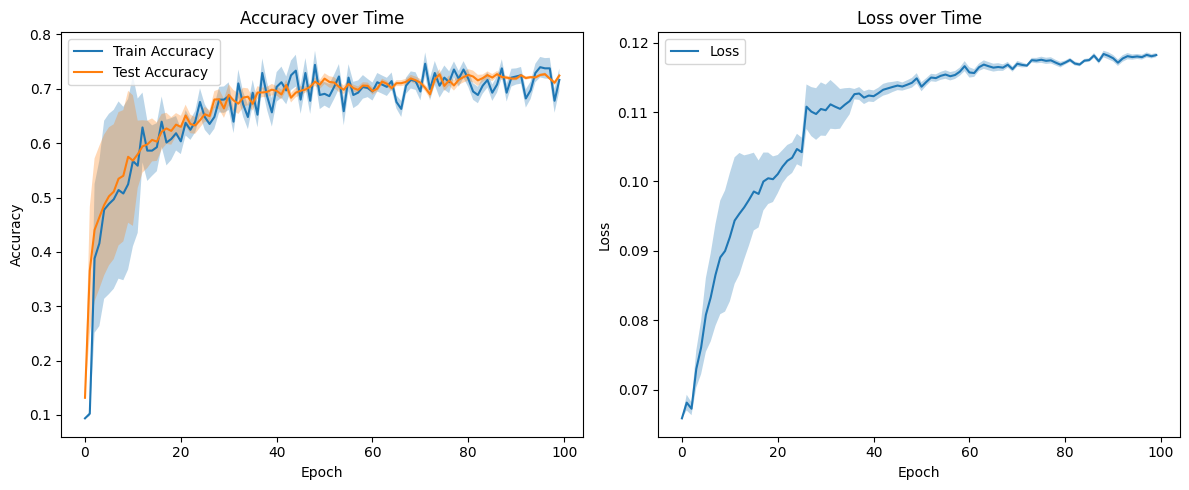

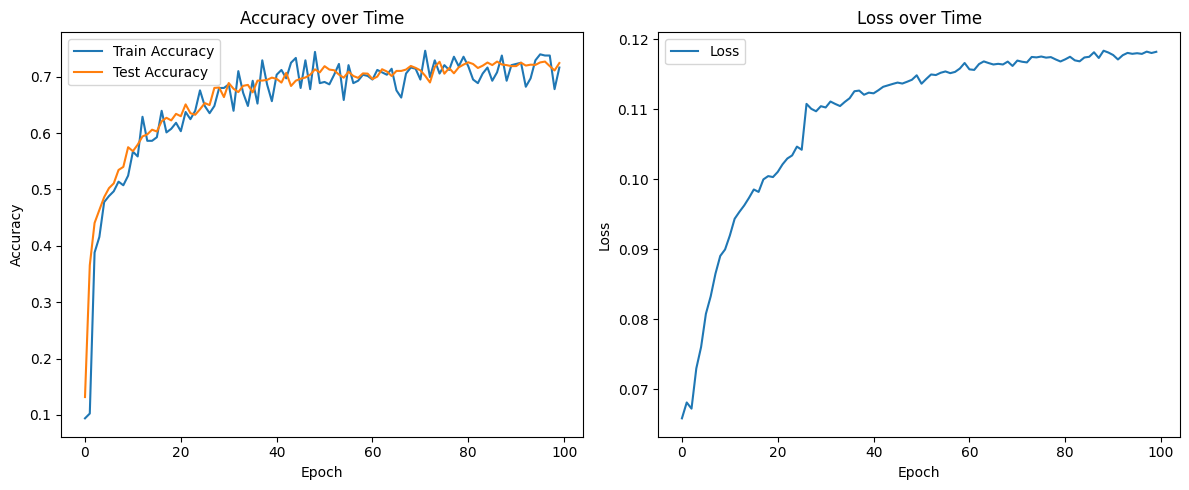

Final Train Accuracy: 0.72 ± 0.02
Final Test Accuracy: 0.72 ± 0.00


In [6]:

config = {
    "batch_size": 128,
    "n_epochs": 100,
    "gamma": 0.99,
    "learning_rate": 1e-3, # 0.0005
    "weight_decay": 1e-4,
    "width": 8,
    "grid": 2,
    "method": "KAN",  # "MLP", "KAN"
    "seed": 0,
    "input_size": 8 * 8, # number of features
    "output_size": 10, # number of classes
    "buffer_size": 100000,
    "target_update": 10,
    "warm_up_episodes": 2,
    "num_filters": 4,
    "num_conv_layers": 2,
    "first_channel": 1, # (1,8,8)
    "hidden_dim": 128,
    "feature_selection": True,
    "distribution": "beta", # bernoulli, categorical, gumbel_softmax, gaussian, beta, dirichlet
    "initial_tau": 1.0, # positive float value

}

q_network, train_accuracies, test_accuracies, losses, probs_history, feedback_cost_history, train_acc_stds, test_acc_stds, loss_stds, agent = kanRL(config)

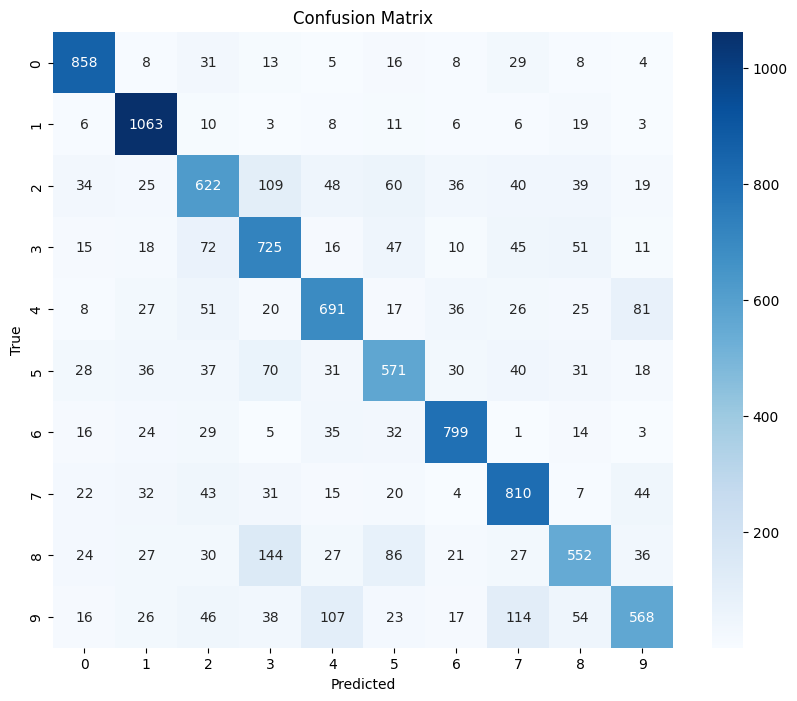

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = []  # Ground truth labels
y_pred = []  # Model predictions

# Assuming `test_loader` is your DataLoader for test set
with torch.no_grad():
    for images, labels in DataLoader(MNIST('./data', train=False, download=True, transform=transforms.Compose([
        transforms.Resize((8, 8)),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])), batch_size=config["batch_size"]):
        state = images.view(-1,config["input_size"])
        if config["feature_selection"] == True:
            flat_zoom_X, _, _ = agent(state)
            state = flat_zoom_X
        outputs = q_network(state)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels)
        y_pred.extend(predicted)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [8]:
import sklearn
print(sklearn.metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       980
           1       0.83      0.94      0.88      1135
           2       0.64      0.60      0.62      1032
           3       0.63      0.72      0.67      1010
           4       0.70      0.70      0.70       982
           5       0.65      0.64      0.64       892
           6       0.83      0.83      0.83       958
           7       0.71      0.79      0.75      1028
           8       0.69      0.57      0.62       974
           9       0.72      0.56      0.63      1009

    accuracy                           0.73     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.73      0.72     10000



In [9]:
import gc
gc.collect()

12434

# KAN width=8 grid=1

In [10]:

config = {
    "batch_size": 128,
    "n_epochs": 100,
    "gamma": 0.99,
    "learning_rate": 1e-3, # 0.0005
    "weight_decay": 1e-4,
    "width": 8,
    "grid": 1,
    "method": "KAN",  # "MLP", "KAN"
    "seed": 0,
    "input_size": 8 * 8, # number of features
    "output_size": 10, # number of classes
    "buffer_size": 100000,
    "target_update": 10,
    "warm_up_episodes": 2,
    "num_filters": 4,
    "num_conv_layers": 2,
    "first_channel": 1, # (1,8,8)
    "hidden_dim": 128,
    "feature_selection": True,
    "distribution": "beta", # bernoulli, categorical, gumbel_softmax, gaussian, beta, dirichlet
    "initial_tau": 1.0, # positive float value

}

q_network, train_accuracies, test_accuracies, losses, probs_history, feedback_cost_history, train_acc_stds, test_acc_stds, loss_stds, agent = kanRL(config)

(1, 8, 8)
FSNet(
  (feature_extractor): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
  )
  (fc1): Linear(in_features=64, out_features=128, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=-1)
)
64


KAN_MNIST_0_1723679712:   0%|          | 0/100 [00:00<?, ?it/s]


correct: 44 total: 469
loss: 0.06612788765097478
 Train accuracy:  0.09381663113006397 | 


KAN_MNIST_0_1723679712:   1%|          | 1/100 [02:21<3:53:15, 141.37s/it]

 Test accuracy:  0.1596



correct: 48 total: 469
loss: 0.08270930811000277
 Train accuracy:  0.1023454157782516 | 


KAN_MNIST_0_1723679712:   2%|▏         | 2/100 [05:32<4:39:02, 170.84s/it]

 Test accuracy:  0.3701



correct: 188 total: 469
loss: 0.08323830264463608
 Train accuracy:  0.40085287846481876 | 


KAN_MNIST_0_1723679712:   3%|▎         | 3/100 [09:06<5:07:50, 190.42s/it]

 Test accuracy:  0.44



correct: 224 total: 469
loss: 0.08979801967072842
 Train accuracy:  0.47761194029850745 | 


KAN_MNIST_0_1723679712:   4%|▍         | 4/100 [12:38<5:18:20, 198.96s/it]

 Test accuracy:  0.5222



correct: 256 total: 469
loss: 0.09459564363015995
 Train accuracy:  0.5458422174840085 | 


KAN_MNIST_0_1723679712:   5%|▌         | 5/100 [16:11<5:23:09, 204.09s/it]

 Test accuracy:  0.54



correct: 261 total: 469
loss: 0.09710506359333677
 Train accuracy:  0.5565031982942431 | 


KAN_MNIST_0_1723679712:   6%|▌         | 6/100 [19:45<5:24:55, 207.40s/it]

 Test accuracy:  0.5428



correct: 264 total: 469
loss: 0.09931021604710805
 Train accuracy:  0.5628997867803838 | 


KAN_MNIST_0_1723679712:   7%|▋         | 7/100 [23:20<5:25:04, 209.72s/it]

 Test accuracy:  0.5788



correct: 270 total: 469
loss: 0.10123506731697238
 Train accuracy:  0.5756929637526652 | 


KAN_MNIST_0_1723679712:   8%|▊         | 8/100 [26:54<5:23:41, 211.11s/it]

 Test accuracy:  0.6011



correct: 286 total: 469
loss: 0.10287050615305077
 Train accuracy:  0.6098081023454158 | 


KAN_MNIST_0_1723679712:   9%|▉         | 9/100 [30:34<5:24:45, 214.13s/it]

 Test accuracy:  0.6273



correct: 284 total: 469
loss: 0.10460364985377041
 Train accuracy:  0.605543710021322 | 


KAN_MNIST_0_1723679712:  10%|█         | 10/100 [34:12<5:22:34, 215.05s/it]

 Test accuracy:  0.6385



correct: 272 total: 469
loss: 0.10501994807392295
 Train accuracy:  0.579957356076759 | 


KAN_MNIST_0_1723679712:  11%|█         | 11/100 [37:47<5:19:10, 215.17s/it]

 Test accuracy:  0.6382



correct: 295 total: 469
loss: 0.1077230488345313
 Train accuracy:  0.6289978678038379 | 


KAN_MNIST_0_1723679712:  12%|█▏        | 12/100 [41:22<5:15:41, 215.24s/it]

 Test accuracy:  0.6411



correct: 295 total: 469
loss: 0.10820720610079734
 Train accuracy:  0.6289978678038379 | 


KAN_MNIST_0_1723679712:  13%|█▎        | 13/100 [44:58<5:12:20, 215.41s/it]

 Test accuracy:  0.6565



correct: 315 total: 469
loss: 0.10859919228215716
 Train accuracy:  0.6716417910447762 | 


KAN_MNIST_0_1723679712:  14%|█▍        | 14/100 [48:35<5:09:08, 215.68s/it]

 Test accuracy:  0.6635



correct: 313 total: 469
loss: 0.10945439665937728
 Train accuracy:  0.6673773987206824 | 


KAN_MNIST_0_1723679712:  15%|█▌        | 15/100 [52:11<5:06:03, 216.04s/it]

 Test accuracy:  0.6593



correct: 304 total: 469
loss: 0.11001166262860491
 Train accuracy:  0.6481876332622601 | 


KAN_MNIST_0_1723679712:  16%|█▌        | 16/100 [55:49<5:03:10, 216.55s/it]

 Test accuracy:  0.6609



correct: 307 total: 469
loss: 0.11015266060892707
 Train accuracy:  0.6545842217484008 | 


KAN_MNIST_0_1723679712:  17%|█▋        | 17/100 [59:27<4:59:55, 216.81s/it]

 Test accuracy:  0.6527



correct: 317 total: 469
loss: 0.11087941635709836
 Train accuracy:  0.67590618336887 | 


KAN_MNIST_0_1723679712:  18%|█▊        | 18/100 [1:03:04<4:56:35, 217.02s/it]

 Test accuracy:  0.6702



correct: 319 total: 469
loss: 0.11099296442862512
 Train accuracy:  0.6801705756929638 | 


KAN_MNIST_0_1723679712:  19%|█▉        | 19/100 [1:06:42<4:53:17, 217.26s/it]

 Test accuracy:  0.6689



correct: 307 total: 469
loss: 0.11078045177243666
 Train accuracy:  0.6545842217484008 | 


KAN_MNIST_0_1723679712:  20%|██        | 20/100 [1:10:21<4:50:30, 217.88s/it]

 Test accuracy:  0.6864



correct: 296 total: 469
loss: 0.11193530153491095
 Train accuracy:  0.6311300639658849 | 


KAN_MNIST_0_1723679712:  21%|██        | 21/100 [1:14:05<4:49:08, 219.60s/it]

 Test accuracy:  0.6606



correct: 319 total: 469
loss: 0.11139085347146623
 Train accuracy:  0.6801705756929638 | 


KAN_MNIST_0_1723679712:  22%|██▏       | 22/100 [1:17:47<4:46:31, 220.41s/it]

 Test accuracy:  0.6957



correct: 303 total: 469
loss: 0.11314896900834305
 Train accuracy:  0.6460554371002132 | 


KAN_MNIST_0_1723679712:  23%|██▎       | 23/100 [1:21:30<4:43:37, 221.01s/it]

 Test accuracy:  0.6855



correct: 317 total: 469
loss: 0.11313100788257778
 Train accuracy:  0.67590618336887 | 


KAN_MNIST_0_1723679712:  24%|██▍       | 24/100 [1:25:11<4:40:08, 221.16s/it]

 Test accuracy:  0.6847



correct: 343 total: 469
loss: 0.11301540441985831
 Train accuracy:  0.7313432835820896 | 


KAN_MNIST_0_1723679712:  25%|██▌       | 25/100 [1:28:50<4:35:44, 220.59s/it]

 Test accuracy:  0.6822



correct: 319 total: 469
loss: 0.11307340591891742
 Train accuracy:  0.6801705756929638 | 


KAN_MNIST_0_1723679712:  26%|██▌       | 26/100 [1:32:59<4:42:31, 229.07s/it]

 Test accuracy:  0.6721



correct: 315 total: 469
loss: 0.1197168648020545
 Train accuracy:  0.6716417910447762 | 


KAN_MNIST_0_1723679712:  27%|██▋       | 27/100 [1:36:39<4:35:09, 226.16s/it]

 Test accuracy:  0.6857



correct: 313 total: 469
loss: 0.11915507869743334
 Train accuracy:  0.6673773987206824 | 


KAN_MNIST_0_1723679712:  28%|██▊       | 28/100 [1:40:21<4:30:12, 225.18s/it]

 Test accuracy:  0.6901



correct: 311 total: 469
loss: 0.11931031170303125
 Train accuracy:  0.6631130063965884 | 


KAN_MNIST_0_1723679712:  29%|██▉       | 29/100 [1:44:05<4:26:04, 224.85s/it]

 Test accuracy:  0.674



correct: 323 total: 469
loss: 0.12051398413521903
 Train accuracy:  0.6886993603411514 | 


KAN_MNIST_0_1723679712:  30%|███       | 30/100 [1:47:44<4:20:13, 223.04s/it]

 Test accuracy:  0.6492



correct: 323 total: 469
loss: 0.11973623307084223
 Train accuracy:  0.6886993603411514 | 


KAN_MNIST_0_1723679712:  31%|███       | 31/100 [1:51:24<4:15:12, 221.92s/it]

 Test accuracy:  0.6875



correct: 305 total: 469
loss: 0.1207228314393619
 Train accuracy:  0.650319829424307 | 


KAN_MNIST_0_1723679712:  32%|███▏      | 32/100 [1:55:04<4:10:53, 221.37s/it]

 Test accuracy:  0.6862



correct: 319 total: 469
loss: 0.1207729636796756
 Train accuracy:  0.6801705756929638 | 


KAN_MNIST_0_1723679712:  33%|███▎      | 33/100 [1:58:43<4:06:36, 220.84s/it]

 Test accuracy:  0.6764



correct: 311 total: 469
loss: 0.12188618263201927
 Train accuracy:  0.6631130063965884 | 


KAN_MNIST_0_1723679712:  34%|███▍      | 34/100 [2:02:22<4:02:19, 220.29s/it]

 Test accuracy:  0.6798



correct: 306 total: 469
loss: 0.1219031219956463
 Train accuracy:  0.652452025586354 | 


KAN_MNIST_0_1723679712:  35%|███▌      | 35/100 [2:06:07<3:59:59, 221.53s/it]

 Test accuracy:  0.6867



correct: 328 total: 469
loss: 0.12216685748875522
 Train accuracy:  0.6993603411513859 | 


KAN_MNIST_0_1723679712:  36%|███▌      | 36/100 [2:09:51<3:57:19, 222.49s/it]

 Test accuracy:  0.6732



correct: 294 total: 469
loss: 0.12323950434417359
 Train accuracy:  0.6268656716417911 | 


KAN_MNIST_0_1723679712:  37%|███▋      | 37/100 [2:13:39<3:55:09, 223.96s/it]

 Test accuracy:  0.6562



correct: 332 total: 469
loss: 0.12383132380272534
 Train accuracy:  0.7078891257995735 | 


KAN_MNIST_0_1723679712:  38%|███▊      | 38/100 [2:17:26<3:52:33, 225.05s/it]

 Test accuracy:  0.6824



correct: 319 total: 469
loss: 0.12385645588196671
 Train accuracy:  0.6801705756929638 | 


KAN_MNIST_0_1723679712:  39%|███▉      | 39/100 [2:21:12<3:48:52, 225.13s/it]

 Test accuracy:  0.668



correct: 302 total: 469
loss: 0.1240595206936031
 Train accuracy:  0.6439232409381663 | 


KAN_MNIST_0_1723679712:  40%|████      | 40/100 [2:24:53<3:43:56, 223.94s/it]

 Test accuracy:  0.6871



correct: 328 total: 469
loss: 0.1230197866429398
 Train accuracy:  0.6993603411513859 | 


KAN_MNIST_0_1723679712:  41%|████      | 41/100 [2:28:37<3:40:15, 224.00s/it]

 Test accuracy:  0.6876



correct: 317 total: 469
loss: 0.12359686424610203
 Train accuracy:  0.67590618336887 | 


KAN_MNIST_0_1723679712:  42%|████▏     | 42/100 [2:32:19<3:35:49, 223.27s/it]

 Test accuracy:  0.6884



correct: 330 total: 469
loss: 0.12392720379936162
 Train accuracy:  0.7036247334754797 | 


KAN_MNIST_0_1723679712:  43%|████▎     | 43/100 [2:36:00<3:31:30, 222.64s/it]

 Test accuracy:  0.6997



correct: 334 total: 469
loss: 0.12403697021670941
 Train accuracy:  0.7121535181236673 | 


KAN_MNIST_0_1723679712:  44%|████▍     | 44/100 [2:39:43<3:28:02, 222.90s/it]

 Test accuracy:  0.6767



correct: 335 total: 469
loss: 0.12427777201254993
 Train accuracy:  0.7142857142857143 | 


KAN_MNIST_0_1723679712:  45%|████▌     | 45/100 [2:43:26<3:24:22, 222.96s/it]

 Test accuracy:  0.6919



correct: 318 total: 469
loss: 0.12467284743656228
 Train accuracy:  0.6780383795309168 | 


KAN_MNIST_0_1723679712:  46%|████▌     | 46/100 [2:47:09<3:20:29, 222.78s/it]

 Test accuracy:  0.6943



correct: 328 total: 469
loss: 0.12469890049652758
 Train accuracy:  0.6993603411513859 | 


KAN_MNIST_0_1723679712:  47%|████▋     | 47/100 [2:50:53<3:17:09, 223.20s/it]

 Test accuracy:  0.6756



correct: 309 total: 469
loss: 0.12512582848702414
 Train accuracy:  0.6588486140724946 | 


KAN_MNIST_0_1723679712:  48%|████▊     | 48/100 [2:54:38<3:14:00, 223.85s/it]

 Test accuracy:  0.6884



correct: 328 total: 469
loss: 0.12552407134507002
 Train accuracy:  0.6993603411513859 | 


KAN_MNIST_0_1723679712:  49%|████▉     | 49/100 [2:58:24<3:10:49, 224.50s/it]

 Test accuracy:  0.6929



correct: 316 total: 469
loss: 0.12579728129194745
 Train accuracy:  0.673773987206823 | 


KAN_MNIST_0_1723679712:  50%|█████     | 50/100 [3:02:06<3:06:17, 223.56s/it]

 Test accuracy:  0.6975



correct: 327 total: 469
loss: 0.12507214235153788
 Train accuracy:  0.697228144989339 | 


KAN_MNIST_0_1723679712:  51%|█████     | 51/100 [3:05:49<3:02:36, 223.60s/it]

 Test accuracy:  0.6733



correct: 308 total: 469
loss: 0.12493491436499776
 Train accuracy:  0.6567164179104478 | 


KAN_MNIST_0_1723679712:  52%|█████▏    | 52/100 [3:09:33<2:58:48, 223.51s/it]

 Test accuracy:  0.6774



correct: 320 total: 469
loss: 0.12564425950429078
 Train accuracy:  0.6823027718550106 | 


KAN_MNIST_0_1723679712:  53%|█████▎    | 53/100 [3:13:13<2:54:15, 222.46s/it]

 Test accuracy:  0.7004



correct: 334 total: 469
loss: 0.12611709018823689
 Train accuracy:  0.7121535181236673 | 


KAN_MNIST_0_1723679712:  54%|█████▍    | 54/100 [3:16:54<2:50:20, 222.19s/it]

 Test accuracy:  0.6845



correct: 301 total: 469
loss: 0.1261740320368108
 Train accuracy:  0.6417910447761194 | 


KAN_MNIST_0_1723679712:  55%|█████▌    | 55/100 [3:20:35<2:46:23, 221.86s/it]

 Test accuracy:  0.692



correct: 313 total: 469
loss: 0.12626931307984313
 Train accuracy:  0.6673773987206824 | 


KAN_MNIST_0_1723679712:  56%|█████▌    | 56/100 [3:24:17<2:42:43, 221.90s/it]

 Test accuracy:  0.6942



correct: 314 total: 469
loss: 0.12538567290250172
 Train accuracy:  0.6695095948827292 | 


KAN_MNIST_0_1723679712:  57%|█████▋    | 57/100 [3:28:02<2:39:33, 222.63s/it]

 Test accuracy:  0.697



correct: 324 total: 469
loss: 0.12607049662421252
 Train accuracy:  0.6908315565031983 | 


KAN_MNIST_0_1723679712:  58%|█████▊    | 58/100 [3:31:46<2:36:12, 223.16s/it]

 Test accuracy:  0.6765



correct: 311 total: 469
loss: 0.12633198718907737
 Train accuracy:  0.6631130063965884 | 


KAN_MNIST_0_1723679712:  59%|█████▉    | 59/100 [3:35:32<2:33:00, 223.92s/it]

 Test accuracy:  0.6956



correct: 312 total: 469
loss: 0.12645784188816542
 Train accuracy:  0.6652452025586354 | 


KAN_MNIST_0_1723679712:  60%|██████    | 60/100 [3:39:16<2:29:15, 223.88s/it]

 Test accuracy:  0.6612



correct: 325 total: 469
loss: 0.12623827388164585
 Train accuracy:  0.6929637526652452 | 


KAN_MNIST_0_1723679712:  61%|██████    | 61/100 [3:42:58<2:25:13, 223.43s/it]

 Test accuracy:  0.6791



correct: 315 total: 469
loss: 0.12671041436223332
 Train accuracy:  0.6716417910447762 | 


KAN_MNIST_0_1723679712:  62%|██████▏   | 62/100 [3:46:41<2:21:22, 223.24s/it]

 Test accuracy:  0.6917



correct: 320 total: 469
loss: 0.12572718405329597
 Train accuracy:  0.6823027718550106 | 


KAN_MNIST_0_1723679712:  63%|██████▎   | 63/100 [3:50:28<2:18:21, 224.37s/it]

 Test accuracy:  0.6951



correct: 313 total: 469
loss: 0.12665193623253532
 Train accuracy:  0.6673773987206824 | 


KAN_MNIST_0_1723679712:  64%|██████▍   | 64/100 [3:54:13<2:14:52, 224.79s/it]

 Test accuracy:  0.697



correct: 328 total: 469
loss: 0.12697416453409804
 Train accuracy:  0.6993603411513859 | 


KAN_MNIST_0_1723679712:  65%|██████▌   | 65/100 [3:57:56<2:10:46, 224.17s/it]

 Test accuracy:  0.6672



correct: 297 total: 469
loss: 0.12724737640319347
 Train accuracy:  0.6332622601279317 | 


KAN_MNIST_0_1723679712:  66%|██████▌   | 66/100 [4:01:39<2:06:43, 223.65s/it]

 Test accuracy:  0.6961



correct: 306 total: 469
loss: 0.12617662854031966
 Train accuracy:  0.652452025586354 | 


KAN_MNIST_0_1723679712:  67%|██████▋   | 67/100 [4:05:21<2:02:50, 223.34s/it]

 Test accuracy:  0.6962



correct: 320 total: 469
loss: 0.1264657853032226
 Train accuracy:  0.6823027718550106 | 


KAN_MNIST_0_1723679712:  68%|██████▊   | 68/100 [4:09:03<1:58:51, 222.86s/it]

 Test accuracy:  0.6931



correct: 317 total: 469
loss: 0.1269559737588805
 Train accuracy:  0.67590618336887 | 


KAN_MNIST_0_1723679712:  69%|██████▉   | 69/100 [4:12:46<1:55:09, 222.88s/it]

 Test accuracy:  0.6837



correct: 332 total: 469
loss: 0.125909585354806
 Train accuracy:  0.7078891257995735 | 


KAN_MNIST_0_1723679712:  70%|███████   | 70/100 [4:16:32<1:51:51, 223.72s/it]

 Test accuracy:  0.698



correct: 319 total: 469
loss: 0.12634131491883224
 Train accuracy:  0.6801705756929638 | 


KAN_MNIST_0_1723679712:  71%|███████   | 71/100 [4:20:14<1:47:56, 223.34s/it]

 Test accuracy:  0.6976



correct: 333 total: 469
loss: 0.1263824827444833
 Train accuracy:  0.7100213219616205 | 


KAN_MNIST_0_1723679712:  72%|███████▏  | 72/100 [4:23:57<1:44:06, 223.10s/it]

 Test accuracy:  0.6951



correct: 313 total: 469
loss: 0.12649327343397304
 Train accuracy:  0.6673773987206824 | 


KAN_MNIST_0_1723679712:  73%|███████▎  | 73/100 [4:27:40<1:40:25, 223.17s/it]

 Test accuracy:  0.6904



correct: 325 total: 469
loss: 0.12741346852675176
 Train accuracy:  0.6929637526652452 | 


KAN_MNIST_0_1723679712:  74%|███████▍  | 74/100 [4:31:22<1:36:30, 222.72s/it]

 Test accuracy:  0.692



correct: 321 total: 469
loss: 0.1268463727475992
 Train accuracy:  0.6844349680170576 | 


KAN_MNIST_0_1723679712:  75%|███████▌  | 75/100 [4:35:04<1:32:45, 222.60s/it]

 Test accuracy:  0.6878



correct: 321 total: 469
loss: 0.12675521897672337
 Train accuracy:  0.6844349680170576 | 


KAN_MNIST_0_1723679712:  76%|███████▌  | 76/100 [4:38:47<1:29:08, 222.87s/it]

 Test accuracy:  0.694



correct: 328 total: 469
loss: 0.1271246959691617
 Train accuracy:  0.6993603411513859 | 


KAN_MNIST_0_1723679712:  77%|███████▋  | 77/100 [4:42:33<1:25:43, 223.63s/it]

 Test accuracy:  0.7011



correct: 338 total: 469
loss: 0.1269550446603598
 Train accuracy:  0.720682302771855 | 


KAN_MNIST_0_1723679712:  78%|███████▊  | 78/100 [4:46:16<1:21:58, 223.59s/it]

 Test accuracy:  0.679



correct: 311 total: 469
loss: 0.12653942476076357
 Train accuracy:  0.6631130063965884 | 


KAN_MNIST_0_1723679712:  79%|███████▉  | 79/100 [4:49:59<1:18:07, 223.22s/it]

 Test accuracy:  0.6842



correct: 330 total: 469
loss: 0.12696647728239296
 Train accuracy:  0.7036247334754797 | 


KAN_MNIST_0_1723679712:  80%|████████  | 80/100 [4:53:43<1:14:31, 223.59s/it]

 Test accuracy:  0.7048



correct: 321 total: 469
loss: 0.12660546800983485
 Train accuracy:  0.6844349680170576 | 


KAN_MNIST_0_1723679712:  81%|████████  | 81/100 [4:57:27<1:10:47, 223.56s/it]

 Test accuracy:  0.6874



correct: 319 total: 469
loss: 0.12753322021539276
 Train accuracy:  0.6801705756929638 | 


KAN_MNIST_0_1723679712:  82%|████████▏ | 82/100 [5:01:10<1:07:04, 223.61s/it]

 Test accuracy:  0.685



correct: 312 total: 469
loss: 0.12691923534310956
 Train accuracy:  0.6652452025586354 | 


KAN_MNIST_0_1723679712:  83%|████████▎ | 83/100 [5:04:56<1:03:31, 224.21s/it]

 Test accuracy:  0.6986



correct: 326 total: 469
loss: 0.1268150062480969
 Train accuracy:  0.6950959488272921 | 


KAN_MNIST_0_1723679712:  84%|████████▍ | 84/100 [5:08:43<1:00:00, 225.04s/it]

 Test accuracy:  0.6984



correct: 330 total: 469
loss: 0.12683677163396054
 Train accuracy:  0.7036247334754797 | 


KAN_MNIST_0_1723679712:  85%|████████▌ | 85/100 [5:12:28<56:16, 225.08s/it]  

 Test accuracy:  0.7053



correct: 307 total: 469
loss: 0.12677422011775502
 Train accuracy:  0.6545842217484008 | 


KAN_MNIST_0_1723679712:  86%|████████▌ | 86/100 [5:16:08<52:08, 223.47s/it]

 Test accuracy:  0.7049



correct: 309 total: 469
loss: 0.12741285162185556
 Train accuracy:  0.6588486140724946 | 


KAN_MNIST_0_1723679712:  87%|████████▋ | 87/100 [5:19:48<48:13, 222.61s/it]

 Test accuracy:  0.6997



correct: 327 total: 469
loss: 0.1268608541503898
 Train accuracy:  0.697228144989339 | 


KAN_MNIST_0_1723679712:  88%|████████▊ | 88/100 [5:23:29<44:23, 221.99s/it]

 Test accuracy:  0.6897



correct: 323 total: 469
loss: 0.12798201875773066
 Train accuracy:  0.6886993603411514 | 


KAN_MNIST_0_1723679712:  89%|████████▉ | 89/100 [5:27:11<40:43, 222.14s/it]

 Test accuracy:  0.6866



correct: 329 total: 469
loss: 0.1274101021193238
 Train accuracy:  0.7014925373134329 | 


KAN_MNIST_0_1723679712:  90%|█████████ | 90/100 [5:30:52<36:56, 221.66s/it]

 Test accuracy:  0.6883



correct: 323 total: 469
loss: 0.1277341648523233
 Train accuracy:  0.6886993603411514 | 


KAN_MNIST_0_1723679712:  91%|█████████ | 91/100 [5:34:32<33:10, 221.14s/it]

 Test accuracy:  0.695



correct: 311 total: 469
loss: 0.12702813660348655
 Train accuracy:  0.6631130063965884 | 


KAN_MNIST_0_1723679712:  92%|█████████▏| 92/100 [5:38:13<29:28, 221.09s/it]

 Test accuracy:  0.7035



correct: 313 total: 469
loss: 0.12713370025793372
 Train accuracy:  0.6673773987206824 | 


KAN_MNIST_0_1723679712:  93%|█████████▎| 93/100 [5:41:56<25:52, 221.81s/it]

 Test accuracy:  0.6973



correct: 310 total: 469
loss: 0.12736108664002246
 Train accuracy:  0.6609808102345416 | 


KAN_MNIST_0_1723679712:  94%|█████████▍| 94/100 [5:45:37<22:09, 221.52s/it]

 Test accuracy:  0.6679



correct: 339 total: 469
loss: 0.12781164676014548
 Train accuracy:  0.7228144989339019 | 


KAN_MNIST_0_1723679712:  95%|█████████▌| 95/100 [5:49:20<18:30, 222.04s/it]

 Test accuracy:  0.697



correct: 324 total: 469
loss: 0.1274140450968417
 Train accuracy:  0.6908315565031983 | 


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = []  # Ground truth labels
y_pred = []  # Model predictions

# Assuming `test_loader` is your DataLoader for test set
with torch.no_grad():
    for images, labels in DataLoader(MNIST('./data', train=False, download=True, transform=transforms.Compose([
        transforms.Resize((8, 8)),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])), batch_size=config["batch_size"]):
        state = images.view(-1,config["input_size"])
        if config["feature_selection"] == True:
            flat_zoom_X, _, _ = agent(state)
            state = flat_zoom_X
        outputs = q_network(state)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels)
        y_pred.extend(predicted)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import sklearn
print(sklearn.metrics.classification_report(y_true, y_pred))

In [ ]:
import gc
gc.collect()

# KAN width=16 grid=3

In [ ]:

config = {
    "batch_size": 128,
    "n_epochs": 100,
    "gamma": 0.99,
    "learning_rate": 1e-3, # 0.0005
    "weight_decay": 1e-4,
    "width": 16,
    "grid": 3,
    "method": "KAN",  # "MLP", "KAN"
    "seed": 0,
    "input_size": 8 * 8, # number of features
    "output_size": 10, # number of classes
    "buffer_size": 100000,
    "target_update": 10,
    "warm_up_episodes": 2,
    "num_filters": 4,
    "num_conv_layers": 2,
    "first_channel": 1, # (1,8,8)
    "hidden_dim": 128,
    "feature_selection": True,
    "distribution": "beta", # bernoulli, categorical, gumbel_softmax, gaussian, beta, dirichlet
    "initial_tau": 1.0, # positive float value

}

q_network, train_accuracies, test_accuracies, losses, probs_history, feedback_cost_history, train_acc_stds, test_acc_stds, loss_stds, agent = kanRL(config)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = []  # Ground truth labels
y_pred = []  # Model predictions

# Assuming `test_loader` is your DataLoader for test set
with torch.no_grad():
    for images, labels in DataLoader(MNIST('./data', train=False, download=True, transform=transforms.Compose([
        transforms.Resize((8, 8)),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])), batch_size=config["batch_size"]):
        state = images.view(-1,config["input_size"])
        if config["feature_selection"] == True:
            flat_zoom_X, _, _ = agent(state)
            state = flat_zoom_X
        outputs = q_network(state)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels)
        y_pred.extend(predicted)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import sklearn
print(sklearn.metrics.classification_report(y_true, y_pred))

In [ ]:
import gc
gc.collect()

# KAN width=32 grid=3

In [ ]:

config = {
    "batch_size": 128,
    "n_epochs": 100,
    "gamma": 0.99,
    "learning_rate": 1e-3, # 0.0005
    "weight_decay": 1e-4,
    "width": 16,
    "grid": 3,
    "method": "KAN",  # "MLP", "KAN"
    "seed": 0,
    "input_size": 8 * 8, # number of features
    "output_size": 10, # number of classes
    "buffer_size": 100000,
    "target_update": 10,
    "warm_up_episodes": 2,
    "num_filters": 4,
    "num_conv_layers": 2,
    "first_channel": 1, # (1,8,8)
    "hidden_dim": 128,
    "feature_selection": True,
    "distribution": "beta", # bernoulli, categorical, gumbel_softmax, gaussian, beta, dirichlet
    "initial_tau": 1.0, # positive float value

}

q_network, train_accuracies, test_accuracies, losses, probs_history, feedback_cost_history, train_acc_stds, test_acc_stds, loss_stds, agent = kanRL(config)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = []  # Ground truth labels
y_pred = []  # Model predictions

# Assuming `test_loader` is your DataLoader for test set
with torch.no_grad():
    for images, labels in DataLoader(MNIST('./data', train=False, download=True, transform=transforms.Compose([
        transforms.Resize((8, 8)),
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])), batch_size=config["batch_size"]):
        state = images.view(-1,config["input_size"])
        if config["feature_selection"] == True:
            flat_zoom_X, _, _ = agent(state)
            state = flat_zoom_X
        outputs = q_network(state)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels)
        y_pred.extend(predicted)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import sklearn
print(sklearn.metrics.classification_report(y_true, y_pred))

In [ ]:
import gc
gc.collect()